In [1]:
import zipfile
import os

from google.colab import drive

In [2]:
#загрузка датасета в память блокнота
zip_file = '/content/drive/MyDrive/try_data_end.zip'

z=zipfile.ZipFile(zip_file, 'r')
z.extractall()

print(os.listdir)

<built-in function listdir>


In [3]:
import json
import os
import math
import librosa

from os import path

In [4]:
DATASET_PATH = "/content/try_data_end"
JSON_PATH = "fma_data_300.json" #название файла с подсчитанными коэффициентами
SAMPLE_RATE = 22050 #стандартное значение для обработки аудио
TRACK_DURATION = 30 # длительность треков
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION #всего измерений для трека

In [5]:
#функция для подсчета mfcc - мел-кепстральных коэффициентов
def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=10): #кол-во коэффициентов равно 13, перекрытие окон 512, размер окна 2048, кол-во сегментов, на которое аудиодорожка будет разделена 10
    # Формат для структурированного хранения данных
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }
    errors=[]

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments) # количество измерений на один сегмент
    expected_num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length) #количество измерений для каждого вектора mfcc, они должны быть одинаковые, для точности

    # проходим по всем жанрам внутри главной дериктории
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
      print(i)

        # проверка что мы не в корневой директории
      if dirpath is not dataset_path:

            # сохраняем название жанра в файл
        semantic_label = dirpath.split("/")[-1]
        data["mapping"].append(semantic_label)
        print("\nProcessing: {}".format(semantic_label))

            # проходим по всем песням в папке жанра
        for f in filenames[:300]: #берем первые 300 записей, т.к кол-во вычислительных ресурсов ограничено
          print(f)
          b = True
          while b: #продолжать выполнение если появится исключение и предупреждения
            try:
		# загружаем аудио файл в json
              file_path = os.path.join(dirpath, f)

              signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE) #загрузка аудио

              if(len(signal) == 0):
                print("lenght == 0")
                b=False

                # обрабатываем каждый сегмент определенного аудио файла
              for s in range(num_segments):

              # расчитываем начало и конец каждого сегмента
                start = samples_per_segment * s
                finish = start + samples_per_segment

                    # вычисляем mfcc
                mfcc = librosa.feature.mfcc(y = signal[start:finish], sr = sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                mfcc = mfcc.T

                    # сохраняем только те mfcc, что имеют нужную размерность векторов (нужно для точности)
                if len(mfcc) == expected_num_mfcc_vectors_per_segment:
                  data["mfcc"].append(mfcc.tolist())
                  data["labels"].append(int(semantic_label))
                  print("{}, segment:{}".format(file_path, s+1))
                  b = False
                else:
                  b = False
            except:
              errors.append(file_path)
              print("FILE: "+ file_path, "ended with error")
              b = False
              pass

    # сохраняем mfcc в json файл
    with open(json_path, "w") as fp:
      json.dump(data, fp, indent=4)

In [ ]:
save_mfcc(DATASET_PATH, JSON_PATH, num_segments=10) #запускаем функцию

0
1

Processing: Electronic
100535.mp3
FILE: /content/try_data_end/Electronic/100535.mp3 ended with error
107427.mp3
FILE: /content/try_data_end/Electronic/107427.mp3 ended with error
114293.mp3
FILE: /content/try_data_end/Electronic/114293.mp3 ended with error
085343.mp3
FILE: /content/try_data_end/Electronic/085343.mp3 ended with error
027406.mp3
FILE: /content/try_data_end/Electronic/027406.mp3 ended with error
123003.mp3
FILE: /content/try_data_end/Electronic/123003.mp3 ended with error
036380.mp3
FILE: /content/try_data_end/Electronic/036380.mp3 ended with error
084777.mp3
FILE: /content/try_data_end/Electronic/084777.mp3 ended with error
097959.mp3
FILE: /content/try_data_end/Electronic/097959.mp3 ended with error
032433.mp3
FILE: /content/try_data_end/Electronic/032433.mp3 ended with error
125287.mp3
FILE: /content/try_data_end/Electronic/125287.mp3 ended with error
065039.mp3
FILE: /content/try_data_end/Electronic/065039.mp3 ended with error
052638.mp3
FILE: /content/try_data_e

<ipython-input-5-0f347faebdd6>:35: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE) #загрузка аудио
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=0
  warnings.warn(


123645.mp3
FILE: /content/try_data_end/Hip_hop/123645.mp3 ended with error
079610.mp3
FILE: /content/try_data_end/Hip_hop/079610.mp3 ended with error
098578.mp3
FILE: /content/try_data_end/Hip_hop/098578.mp3 ended with error
082780.mp3
FILE: /content/try_data_end/Hip_hop/082780.mp3 ended with error
000695.mp3
FILE: /content/try_data_end/Hip_hop/000695.mp3 ended with error
084111.mp3
FILE: /content/try_data_end/Hip_hop/084111.mp3 ended with error
123147.mp3
FILE: /content/try_data_end/Hip_hop/123147.mp3 ended with error
098628.mp3
FILE: /content/try_data_end/Hip_hop/098628.mp3 ended with error
107027.mp3
FILE: /content/try_data_end/Hip_hop/107027.mp3 ended with error
013767.mp3
FILE: /content/try_data_end/Hip_hop/013767.mp3 ended with error
146151.mp3
FILE: /content/try_data_end/Hip_hop/146151.mp3 ended with error
107028.mp3
FILE: /content/try_data_end/Hip_hop/107028.mp3 ended with error
121323.mp3
FILE: /content/try_data_end/Hip_hop/121323.mp3 ended with error
128443.mp3
FILE: /content

In [ ]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras

import matplotlib.pyplot as plt
import random

import librosa
import math

In [ ]:
from google.colab import files
files.download('/content/fma_data_300.json') #сохраняем файл с подсчитанными коэффициентами на пк

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
DATA_PATH = "/content/fma_data_300.json"

In [ ]:
#загрузка данных
def load_data(data_path):

    with open(data_path, "r") as f:
        data = json.load(f)

    # конвертирую листы numpy в массивы
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded!")

    return  X, y

In [ ]:
#функция для выведения графиков процесса обучения
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # для графика точности
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # для графика потерь
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()


In [ ]:
X, y = load_data(DATA_PATH)

# делим данные на train, validation и test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# добавляем оси для входящих данных
X_train = X_train[..., np.newaxis]
X_validation = X_validation[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [ ]:
X_train.shape

In [ ]:
y_train

In [ ]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)

In [ ]:
input_shape

In [ ]:
#создаем сверточную нейронную сеть
model = keras.Sequential()

model.add(keras.layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                         activation ='relu', input_shape = input_shape))
model.add(keras.layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                         activation ='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.25))


model.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                         activation ='relu'))
model.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                         activation ='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(keras.layers.Dropout(0.25))


model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation = "relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(8, activation = "softmax"))
optimizer = keras.optimizers.legacy.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
print(model.summary())

In [ ]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001) #изменение скорости обучения на основе показаний точности на валидационной выборке

In [ ]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train, 8)
Y_test = np_utils.to_categorical(y_test, 8)
Y_val =  np_utils.to_categorical(y_validation, 8) #перевод в векторный формат

In [ ]:
#обучение мдели
history = model.fit(X_train,Y_train, epochs = 100, validation_data = (X_validation,Y_val),
                              verbose = 1, batch_size=512, callbacks=[learning_rate_reduction])

In [ ]:
plot_history(history)

In [ ]:
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('\nTest accuracy:', test_acc)

In [ ]:
import tensorflow as tf

In [ ]:
y_predict=model.predict(X_test)
y_true=Y_test
res = tf.math.confusion_matrix(y_true,y_predict)

In [ ]:
model.save("/content/drive/MyDrive/fma_model_bonus_track")

In [ ]:
import time

In [ ]:
X_test.shape

(5630, 130, 13, 1)

In [ ]:
Y_test.shape

(5652, 8)

In [ ]:
import tensorflow as tf
new_model = tf.keras.models.load_model('/content/drive/MyDrive/fma_model_300_66')

# Check its architecture
new_model.summary()

In [ ]:
print(Y_test.shape)
print(X_test.shape)

(5630, 8)
(5630, 130, 13, 1)


In [ ]:
#замер скорости
t = time.process_time()
new_model.evaluate(X_test, Y_test, verbose=2)
time_test = time.process_time() - t
print('\nTest time:', time_test)
print('\nTest size:', X_test.shape)

176/176 - 1s - loss: 1.6970 - accuracy: 0.5767 - 802ms/epoch - 5ms/step

Test time: 0.8093198960000336

Test size: (5630, 130, 13, 1)


In [ ]:
y_predict=new_model.predict(X_test)
y_true=Y_test

177/177 [==============================] - 36s 205ms/step


In [ ]:
y_predict

array([[5.23154020e-01, 1.84108242e-01, 1.48775667e-01, ...,
        3.40821862e-04, 7.77805597e-03, 7.41215199e-02],
       [1.10910900e-01, 1.36332929e-01, 2.66403437e-01, ...,
        3.78582515e-02, 2.98464060e-01, 4.48161811e-02],
       [5.10447705e-03, 2.08579488e-02, 1.43503596e-03, ...,
        1.11699069e-03, 5.02951086e-01, 4.61842269e-01],
       ...,
       [7.93880608e-04, 3.76754673e-03, 1.20894030e-01, ...,
        2.88744897e-01, 5.58409035e-01, 2.33498830e-02],
       [4.90082622e-01, 1.30890518e-01, 1.40018323e-02, ...,
        3.29428092e-02, 2.54252553e-01, 3.71756367e-02],
       [2.53903773e-03, 6.42361492e-02, 1.33890435e-02, ...,
        5.03109157e-01, 2.69069910e-01, 5.96430600e-02]], dtype=float32)

In [ ]:
y_predict[0]
for i in y_predict[0]:
  print(i*100)

52.315402030944824
18.410824239253998
14.877566695213318
1.3058547861874104
4.866313189268112
0.03408218617551029
0.7778055965900421
7.412151992321014


In [ ]:
results =[]
for i in y_predict:
  # get index with max value
  predicted_index = np.argmax(i)
  results.append(predicted_index)
results= np.array(results)

In [ ]:
results

array([0, 6, 6, ..., 6, 0, 5])

In [ ]:
Y_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:
y_test[30:40]

array([6, 1, 1, 7, 3, 2, 3, 7, 1, 4])

In [ ]:
res = tf.math.confusion_matrix(y_test,results)

In [ ]:
import pandas as pd

<Axes: title={'center': 'Confusion matrix of CNN'}>

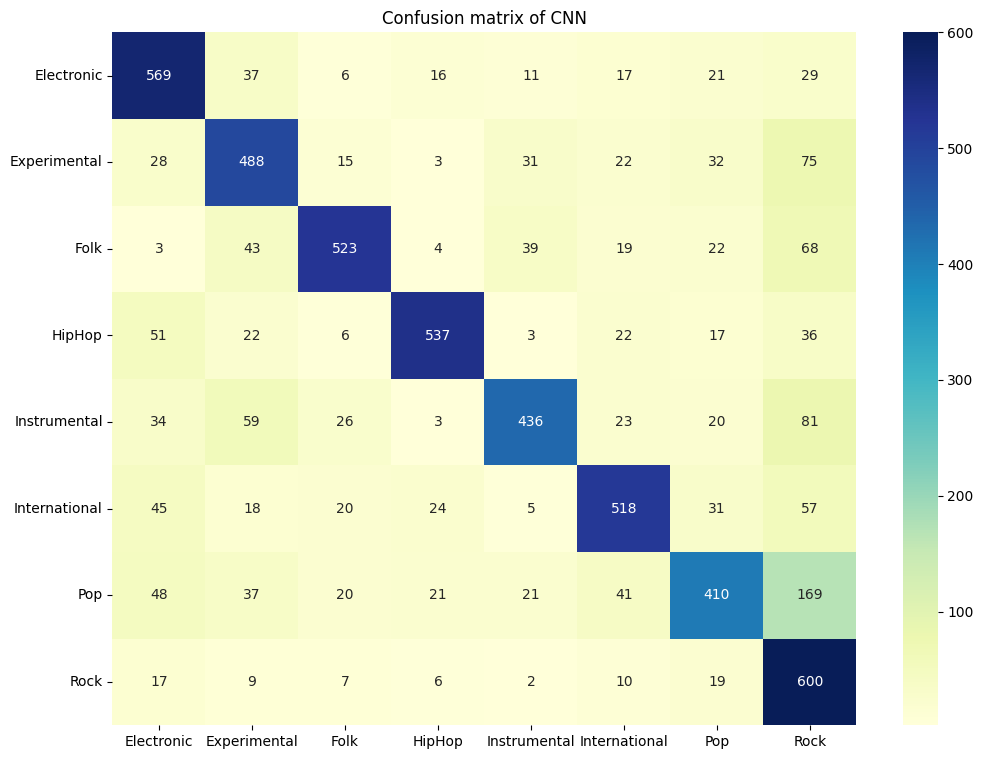

In [ ]:
#вывод матрицы ошибок
import seaborn as sn
grid_cm = pd.DataFrame(res, index = ["Electronic", "Experimental", "Folk", "HipHop", "Instrumental", "International", "Pop", "Rock"],
                  columns = ["Electronic", "Experimental", "Folk", "HipHop", "Instrumental", "International", "Pop", "Rock"])
plt.figure(figsize = (12,9))
plt.title("Confusion matrix of CNN")
sn.heatmap(grid_cm, annot=True, cmap="YlGnBu", fmt=".0f")

In [ ]:
test_loss, test_acc = new_model.evaluate(X_test, Y_test, verbose=2)
print('\nTest accuracy:', test_acc)
train_loss, train_acc = new_model.evaluate(X_train, Y_train, verbose=2)
print('\nTrain accuracy:', train_acc)
val_loss, val_acc = new_model.evaluate(X_validation, Y_val, verbose=2)
print('\nValidation accuracy:', val_acc)

177/177 - 22s - loss: 0.8301 - accuracy: 0.7220 - 22s/epoch - 123ms/step

Test accuracy: 0.7220453023910522
424/424 - 55s - loss: 0.8332 - accuracy: 0.7289 - 55s/epoch - 130ms/step

Train accuracy: 0.7289147973060608
106/106 - 14s - loss: 0.8219 - accuracy: 0.7228 - 14s/epoch - 132ms/step

Validation accuracy: 0.7227956652641296


In [ ]:
#конвертация модели для мобильного приложения
converter = tf.lite.TFLiteConverter.from_keras_model(new_model)
tflite_model = converter.convert()

# Save the model.
with open('MAINmodel.tflite', 'wb') as f:
  f.write(tflite_model)